Olá,Gabriel

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 

Você estava indo bem.  O projeto está incompleto. Como posso te ajudar?

Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>





<div class="alert alert-block alert-success">
<b> Comentário final do revisor: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>


# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você trabalha neste projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de começar a análise dos dados, explique com suas próprias palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

- **Introdução**

O projeto consiste na análise de dados de uma empresa de telefonia cujo produto são planos pré-pagos que contemplam valores benefícios específicos. O objetivo do estudo é entender, dentro das amostras observadas, qual plano é mais lucrativo para a empresa. O desafio aqui será entender não apenas quanto é recebido mediante a contratação dos planos, mas também quanto é recebido quando o usuário extrapola seus respectivos limites dos benefícios contratados.

Inicialmente será necessário fazer o tratamento dos dados. Entender quais desejamos utilizar, se os tipos de dados são adequados, se há dados repetidos ou ausentes. Em seguida, avaliar os dados para entender se a amostra pode ser tratada de forma global ou se será necessário estratifica-la. Por fim, realizar as análises propriamente ditas.

## Inicialização

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
# Carregando todas as bibliotecas



## Carregue os dados

In [2]:
df_users = pd.read_csv("/datasets/megaline_users.csv")# Carregue os arquivos de dados em diferentes DataFrames
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")


## Prepare os dados

Para avaliar se a leitura dos dados .csv foram realizados corretamente, apenas chamei as funções .info e .head para visualizar os dados. Aparentemente todos corretos, o caractere de separação dos dados era o tradicional, portanto é possível passar para a próxima etapa.

In [3]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [7]:
df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Planos

In [8]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprima uma amostra de dados dos planos
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Descreva o que você nota sobre as informações gerais e sobre a amostra de dados impressa acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

## Corrija os dados

Não há erros significativos na base de dados.

## Enriqueça os dados

Foi apenas criada uma coluna convertendo o valor do pacote de dados incluso no plano para gigabytes (espera-se utilizar esta unidade ao longo do projeto).

In [10]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

In [11]:
df_plans.info()
df_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuários

In [12]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprima uma amostra de dados dos usuários
df_users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Os dados apresentam estrutura que possibilita trabalha-los.

### Corrija os dados

As duas colunas de datas estão classificadas como "object". Necessário transforma-las no formato padrão de data.

In [14]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date']) #transformando dados em 'datetime'
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

In [15]:
df_users[df_users.duplicated()] #verificando se há linhas repetidas

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

In [17]:
df_users['year_month'] = df_users['reg_date'].dt.to_period('M') #Criando coluna para filtrar dados mensalmente.

In [18]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month
82,1082,Dominic,Witt,64,"Memphis, TN-MS-AR MSA",2018-04-15,surf,NaT,2018-04
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaT,2018-02
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaT,2018-11
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21,2018-10
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaT,2018-07


## Chamadas

In [19]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
# Imprima uma amostra de dados das chamadas
df_calls.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Necessário realizar mesmo procedimento do DF Users. 
Para já deixarmos os dados tratados para analisa-los de forma mais prática: Como o custo de ligação leva em consideração frações de minutos, precisamos primeiro arredondar os dados de duração de chamada para cima e em seguida consolidar os valores somando todos os minutos de ligação por usuário. 

### Corrija os dados

In [21]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']) #transformando dados em 'datetime'

### Enriqueça os dados

Inserindo uma coluna com os valores de duração de chamada arredondados para cima (pois o cálculo de custo da chamada leva em consideração frações de minuto como um minuto completo). Em seguida, criado um novo DF com uso de groupby com os dados de minutos totais de ligação utilizados por usuário para então inserir no novo dataframe "df_database" que consolidará as informações que iremos analisar ao longo do projeto. 

In [22]:
df_calls['year_month'] = df_calls['call_date'].dt.to_period('M') #Criando coluna para filtrar dados mensalmente.

In [23]:
df_call_duration = df_calls.groupby('user_id')['duration'].sum() #criando DF com os dados de total de minutos de ligação por usuário.

In [24]:
df_database = df_users.merge(df_call_duration, on = 'user_id', how='left') #criada base de dados para junção dos dados que precisaremos analisar. 
#Neste caso, inserindo coluna com total consolidado de minutos de ligação utilizados.
df_database.rename(columns = {'duration': 'call_min'}, inplace=True) #Clareando o nome da nova coluna
df_database['call_min']=df_database['call_min'].fillna(0) #preenchendo possíveis valores nulos
df_database.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month,call_min
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12,116.83
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08,1640.46
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10,777.13
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-01,1041.00
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-05,2618.95


## Mensagens

In [25]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprima uma amostra dos dados das mensagens
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


O DF apresenta dados de mensagens enviadas por cada usuário (cada mensagem gerou uma linha na base). Será necessário repetir o procedimento dos DFs anteriores.

### Corrija os dados

In [27]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']) #transformando dados em 'datetime'

### Enriqueça os dados

Abaixo, criaremos novamente uma coluna para filtrar mensalmente os dados e novamente alimentaremos o banco de dados geral com os dados de mensagens.

In [28]:
df_messages['year_month'] = df_messages['message_date'].dt.to_period('M') #Criando coluna para filtrar dados mensalmente.
df_messages.head()

,id,user_id,message_date,year_month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [29]:
df_messages_tot = df_messages.groupby('user_id')['id'].count() #Contabilizando total de mensagens enviadas por usuário
df_database = df_database.merge(df_messages_tot, on = 'user_id', how='left') #Mesclando DFs
df_database.rename(columns = {'id': 'messages_count'}, inplace=True) #Alterando nome da coluna
df_database['messages_count']=df_database['messages_count'].fillna(0) #preenchendo possíveis valores nulos
df_database.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month,call_min,messages_count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12,116.83,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08,1640.46,207.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10,777.13,88.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-01,1041.00,50.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-05,2618.95,177.0
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,2018-11,470.22,11.0
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2018-11,64.11,154.0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,2018-07,2484.15,255.0
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,2018-08,1473.31,84.0
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,2018-04,5589.68,0.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Como você começou com df_users, me parece correto usar how='left'. Geralmente usamos how='outer' no merge. Deixo este link como referência: https://www.educba.com/python-pandas-join/
</div>

## Internet

In [30]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


A base contém dados de consumo diário de dados (em mb) para cada usuário. Apenas alteraremos o tipo de dados de datas para datetime.

### Corrija os dados

In [32]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']) #transformando dados em 'datetime'

### Enriqueça os dados

Para esta, já criaremos uma coluna com os dados de consumo de dados de internet em gb. Seguiremos também adicionando a coluna para filtro mensal.
Para podermos analisar corretamente os dados e poder calcular o plano mais lucrativo, precisaremos, assim como nos tópicos anteriores, agrupar os dados de internet consumidos por usuário e mesclar estes dados na nossa base "df_database". 

In [33]:
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M') #Criando coluna para filtrar dados mensalmente.
df_internet.head()

,id,user_id,session_date,mb_used,year_month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


In [34]:
df_internet['gb_used'] = df_internet['mb_used'] / 1024

In [35]:
df_internet_tot = df_internet.groupby('user_id')['gb_used'].sum() #Agrupando dados por usuário
df_database = df_database.merge(df_internet_tot, on = 'user_id', how='left') #Mesclando consultas (adicionando à database)
df_database['gb_used']=df_database['gb_used'].fillna(0) ##preenchendo possíveis valores nulos
(df_database.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year_month,call_min,messages_count,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12,116.83,11.0,1.856904
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08,1640.46,207.0,78.552676
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018-10,777.13,88.0,39.348955
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018-01,1041.00,50.0,26.410293
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018-05,2618.95,177.0,152.688291


## Estude as condições dos planos

Os planos possuem um pacote de benefícios base nas categorias: minutos de ligação, mensagens de texto e pacote de dados de internet. Cada um destes pode ser extrapolado mediante uma taxa fixa, que é cobrada adicionamente por minuto ou fração excedente, mensagem excedente e gb ou fração excedente, respectivamente.

In [36]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
df_plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregue os dados por usuário

[Agora, como os dados estão limpos, os agregue por usuário e por período para ter apenas um registro dessas informações. Isso vai facilitar muito as próximas análises.]

In [37]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
callscount_month = df_calls.groupby(['user_id', 'year_month'])['duration'].count().reset_index()

In [38]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
callssum_month = df_calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index()

In [39]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
messagescount_month = df_messages.groupby(['user_id', 'year_month'])['message_date'].count().reset_index()

In [40]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
sessionsum_month = df_internet.groupby(['user_id', 'year_month'])['gb_used'].sum().reset_index()

[Coloque os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.]

In [41]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
df_analysis = callscount_month.merge(
    callssum_month, on = ['user_id', 'year_month'], how = 'outer').merge(
    messagescount_month, on = ['user_id', 'year_month'], how = 'outer').merge(
    sessionsum_month, on = ['user_id', 'year_month'], how = 'outer').merge(
    df_users, on = ['user_id'], how = 'left')
#Acima foi aplicada a função .merge() para associar todos os dados em colunas. O último dataframe mesclado foi o 'user_id', apenas para puxar também os dados pessoas dos usuários.
df_analysis.rename(columns = {'duration_x': 'call_count'}, inplace=True) #Renomeando coluna
df_analysis.rename(columns = {'duration_y': 'call_sum'}, inplace=True) #Renomeando coluna
df_analysis.rename(columns = {'plan': 'plan_name'}, inplace=True) #Renomeando coluna (facilita para próxima pergunta)

In [42]:
df_analysis.head()

,user_id,year_month_x,call_count,call_sum,message_date,gb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,year_month_y
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018-12
1,1001,2018-08,27.0,171.14,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08
2,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08
4,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018-08


In [43]:
df_analysis['call_sum'] = df_analysis['call_sum'].apply(np.ceil) #Arredondando valor de minutos para cima mensalmente.
df_analysis['gb_used'] = df_analysis['gb_used'].apply(np.ceil) #Arredondando valores de dados usados para cima mensalmente.
df_analysis = df_analysis.sort_values(by='user_id').reset_index(drop=True) #Reordenando DF por usuário.
df_analysis.rename(columns = {'year_month_x': 'year_month'}, inplace=True) #Renomeando coluna


In [44]:
# Adicione as informações sobre o plano
df_analysis = df_analysis.merge(df_plans, on = ['plan_name'], how = 'left')
df_analysis.head(2)

,user_id,year_month,call_count,call_sum,message_date,gb_used,first_name,last_name,age,city,...,churn_date,year_month_y,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,16.0,117.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,2018-12,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,27.0,172.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,2018-08,50,15360,500,20,10,0.03,0.03,15.0


In [45]:
# Calcule a receita mensal para cada usuário
def calc_receita (row): #Definindo função a ser aplicada em cada linha
    receita_total = row['usd_monthly_pay']
    
    if row['message_date'] > row['messages_included']:
        receita_total += (row['message_date'] - row['messages_included']) * row['usd_per_message']

    if row['call_sum'] > row['minutes_included']:
        receita_total += (row['call_sum'] - row['minutes_included']) * row['usd_per_minute']

    if row['gb_used'] > row['gb_per_month_included']:
        receita_total += (row['gb_used'] - row['gb_per_month_included']) * row['usd_per_gb']

    return receita_total


In [46]:
df_analysis['receita_total'] = df_analysis.apply(calc_receita, axis = 1) #aplicando função
df_analysis.head(20)

,user_id,year_month,call_count,call_sum,message_date,gb_used,first_name,last_name,age,city,...,year_month_y,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,receita_total
0,1000,2018-12,16.0,117.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,2018-12,1000,30720,3000,70,7,0.01,0.01,30.0,70.00
1,1001,2018-08,27.0,172.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,2018-08,50,15360,500,20,10,0.03,0.03,15.0,20.00
2,1001,2018-09,49.0,298.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,2018-08,50,15360,500,20,10,0.03,0.03,15.0,20.00
3,1001,2018-10,65.0,375.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,2018-08,50,15360,500,20,10,0.03,0.03,15.0,90.09
4,1001,2018-11,64.0,405.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,2018-08,50,15360,500,20,10,0.03,0.03,15.0,60.00
5,1001,2018-12,56.0,393.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,2018-08,50,15360,500,20,10,0.03,0.03,15.0,60.00
6,1002,2018-10,11.0,55.0,15.0,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,2018-10,50,15360,500,20,10,0.03,0.03,15.0,20.00
7,1002,2018-11,55.0,360.0,32.0,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,2018-10,50,15360,500,20,10,0.03,0.03,15.0,60.00
8,1002,2018-12,47.0,364.0,41.0,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",...,2018-10,50,15360,500,20,10,0.03,0.03,15.0,20.00
9,1003,2018-12,149.0,1041.0,50.0,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",...,2018-01,50,15360,500,20,10,0.03,0.03,15.0,156.23


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados, o que costuma revelar uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para as chamadas. Essas dicas não foram fornecidas para as mensagens e internet, mas o princípio do estudo estatístico é o mesmo em todos os casos.]

### Chamadas

In [47]:
df_calls.head()

,id,user_id,call_date,duration,year_month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [48]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.
#Criada tabela dinâmica compilando as informações necessárias.
pivot_t = df_analysis.pivot_table(index='year_month',
                            columns='plan_name',
                            values= ['call_count', 'call_sum'],
                            aggfunc='mean')
call_mean = pd.DataFrame() #Criado novo DF para agregar as informações que vamos calcular a partir da tabela dinamica acima. Conta simples de média aritmética.
call_mean['surf'] = pivot_t[('call_sum', 'surf')] / pivot_t[('call_count', 'surf')]
call_mean['ultimate'] = pivot_t[('call_sum', 'ultimate')] / pivot_t[('call_count', 'ultimate')]

call_mean

,surf,ultimate
year_month,,
2018-01,6.433333,6.562500
2018-02,6.918033,6.526961
2018-03,6.706929,6.221014
2018-04,6.810966,6.672345
2018-05,6.777804,6.671856
2018-06,6.854914,6.715742
2018-07,6.729259,6.887670
2018-08,6.734692,6.622040
2018-09,6.736627,6.778095


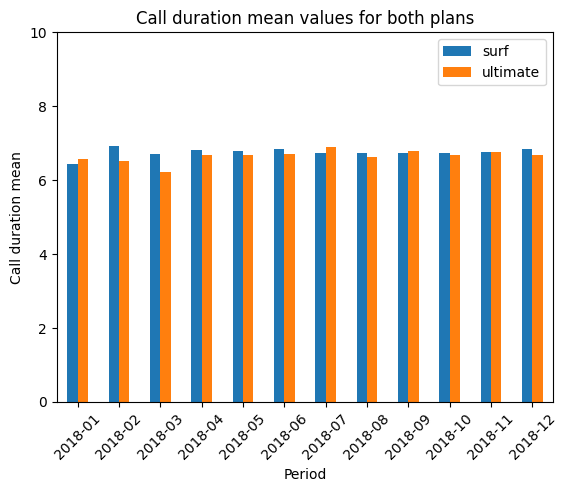

In [49]:
#Criando gráfico. Aumentei o "ylim" para destacar mais a legenda, alterado o "rot" para facilitar a leitura do eixo x.
call_mean.plot(kind = 'bar', xlabel = 'Period', ylabel = 'Call duration mean', title = 'Call duration mean values for both plans', ylim = (0,10), rot = 45)
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisa plotar gráficos</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>


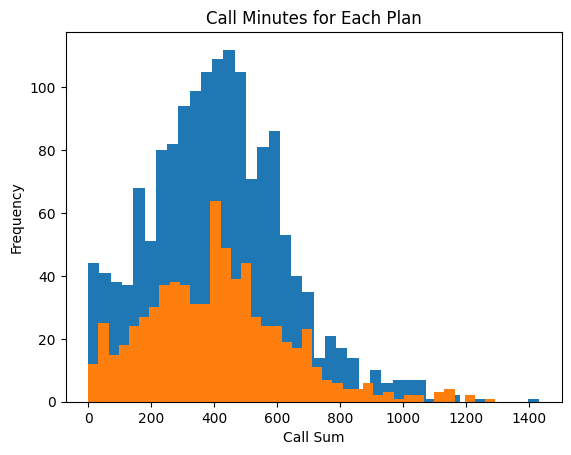

In [50]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.
plt.hist(df_analysis[df_analysis['plan_name'] == 'surf']['call_sum'], bins = 40)
plt.hist(df_analysis[df_analysis['plan_name'] == 'ultimate']['call_sum'], bins = 40)
plt.title('Call Minutes for Each Plan')
plt.xlabel('Call Sum')
plt.ylabel('Frequency')
plt.show()

A partir dos dados acima é possível verificar que a quantidade de minutos de ligação para cada plano se mantém constante, ou seja, independente dos minutos adquiridos no plano, as pessoas em geral utilizam com mais frequência em torno de 400 minutos de ligação por mês. Entretanto, para pessoas que contratam o plano "surf", é possível verificar que há uma parte considerável da curva que ultrapassa os 500 minutos, ou seja, acabam pagando adicionais por minuto de ligação excedente. Para o plano Ultimate, em nenhum caso houve extrapolação da franquia máxima.

[Calcule a média e a variância da duração das chamadas para refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.]

In [51]:
# Calcule a média e a variância da duração mensal das chamadas
# Média para ambos os planos:
aux_calls = df_analysis.groupby('plan_name')['call_sum'].var()
aux_calls

plan_name
surf        47003.004118
ultimate    50517.268776
Name: call_sum, dtype: float64

In [52]:
# Variância para ambos os planos:
aux_calls = df_analysis.groupby('plan_name')['call_sum'].mean()
aux_calls

plan_name
surf        412.594822
ultimate    410.701262
Name: call_sum, dtype: float64

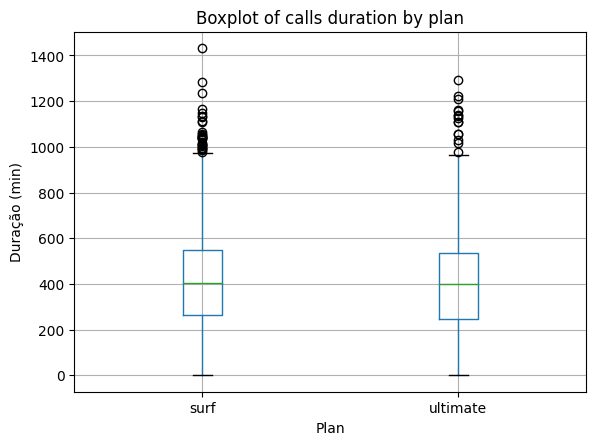

In [53]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
df_analysis.boxplot(column='call_sum', by='plan_name')
plt.title('Boxplot of calls duration by plan')
plt.suptitle('')  # Remove o título padrão
plt.xlabel('Plan')
plt.ylabel('Duração (min)')
plt.show()

O comportamento dos usuários com relação a ligações é muito similar, independente do plano adquirido. Isto pode gerar duas possíveis conclusões:
- Tendo em vista que a quantidade de minutos utilizados é similar, pessoas do plano 'Surf' acabam pagando adicionais com frequência. Isto não ocorre no plano 'Ultimate', portanto é um ponto positivo para este plano.
- Considerando a premissa de que os minutos utilizados são similares independente do plano, a quantidade de minutos que uma pessoa contrata no plano "ultimate" nunca é excedido, portanto está superestimando o uso por usuário.

### Mensagens

In [54]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês
aux_messages = df_analysis.pivot_table(index='year_month',
                            columns='plan_name',
                            values= ['message_date'],
                            aggfunc='mean')
aux_messages

message_date           
plan_name          surf   ultimate
year_month                        
2018-01       21.000000  20.666667
2018-02       21.600000  25.166667
2018-03       21.937500  34.714286
2018-04       24.166667  28.937500
2018-05       33.017857  44.333333
2018-06       33.616438  36.289474
2018-07       35.945055  41.212766
2018-08       37.596774  47.929825
2018-09       39.523179  45.901408
2018-10       42.433862  46.977528
2018-11       40.553097  47.601942
2018-12       48.326772  53.936508

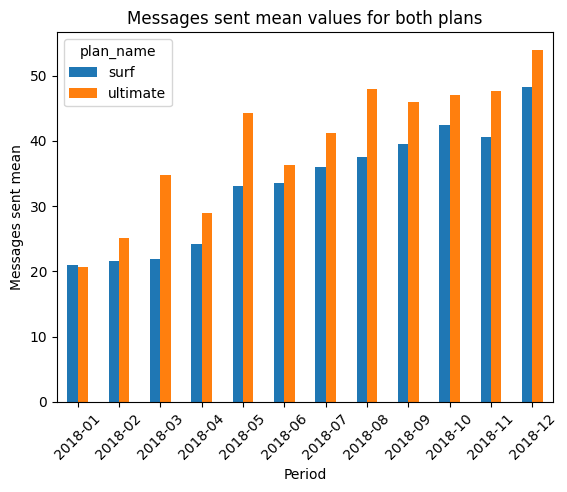

In [55]:
aux_messages['message_date'].plot(kind = 'bar', xlabel = 'Period', ylabel = 'Messages sent mean', title = 'Messages sent mean values for both plans', rot = 45)
plt.show()

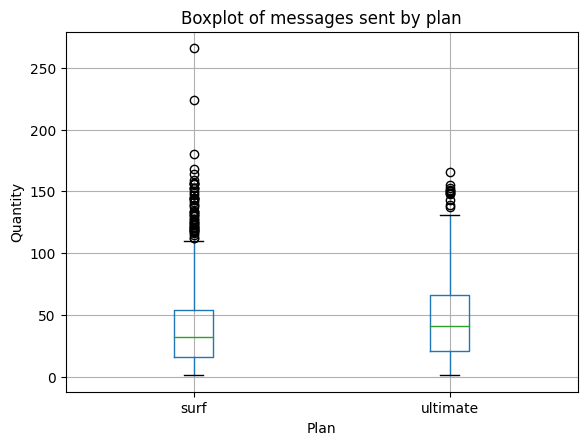

In [56]:
df_analysis.boxplot(column='message_date', by='plan_name')
plt.title('Boxplot of messages sent by plan')
plt.suptitle('')  # Remove o título padrão
plt.xlabel('Plan')
plt.ylabel('Quantity')
plt.show()

A média da quantidade de mensagens enviadas por usuário cresce mensalmente (é maior nos últimos meses do ano) e é ligeiramente maior para usuários do plano Ultimate. Entretanto, para o plano Surf, uma quantidade considerável de usuários extrapola a cota de mensagens incluídas no plano, e precisam pagar adicionais. Nenhum usuário do plano Ultimate precisou da cota máxima (nem um quinto dela!).

### Internet

In [57]:
#Criada tabela dinâmica compilando as informações necessárias.
aux_session = df_analysis.pivot_table(index='year_month',
                            columns='plan_name',
                            values= ['gb_used'],
                            aggfunc='mean')
aux_session

gb_used           
plan_name        surf   ultimate
year_month                      
2018-01      5.000000   7.250000
2018-02     12.222222  17.285714
2018-03     13.565217  18.416667
2018-04     12.469388  16.333333
2018-05     14.302632  16.862069
2018-06     15.810526  15.425532
2018-07     17.016667  16.491525
2018-08     17.201258  17.845070
2018-09     16.777202  17.011628
2018-10     17.632479  17.885714
2018-11     16.548043  17.118110
2018-12     18.296530  18.397351

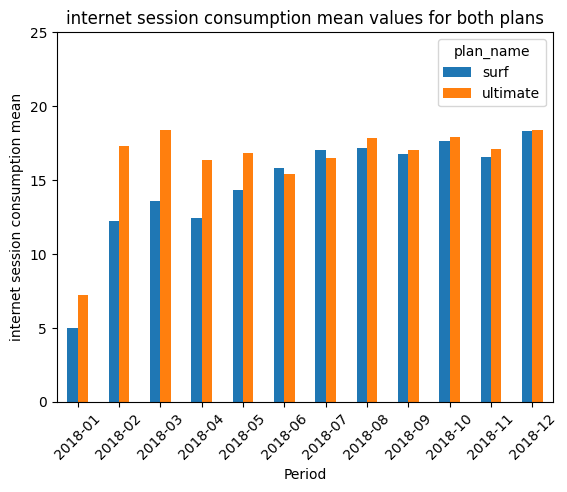

In [58]:
aux_session['gb_used'].plot(kind = 'bar', xlabel = 'Period', ylabel = 'internet session consumption mean', title = 'internet session consumption mean values for both plans',ylim = (0,25), rot = 45)
plt.show()

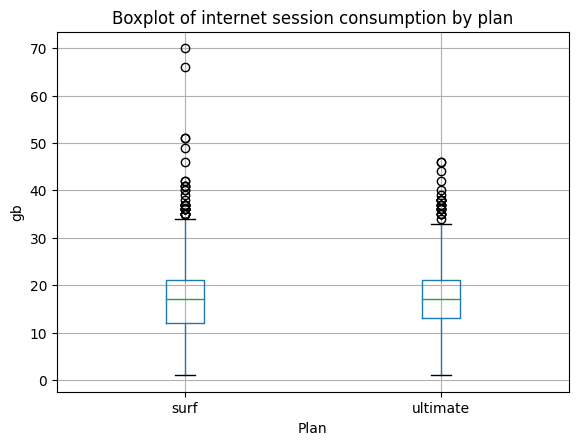

In [59]:
df_analysis.boxplot(column='gb_used', by='plan_name')
plt.title('Boxplot of internet session consumption by plan')
plt.suptitle('')  # Remove o título padrão
plt.xlabel('Plan')
plt.ylabel('gb')
plt.show()

Usuários dos dois planos possuem média mensal de consumo de dados de internet acima de 15mb - limite do plano surf. Isto acarreta em maior geração de adicionais para usuários deste plano.
Usuários do plano Ultimate, em geral, não extrapolam a cota adquirida de 30gb por mês. Entretanto, diferentemente dos valores encontrados para mensagens ou chamadas, está muito próximo de atingi-la e alguns usuários tendem a realizar contratações adicionais. Para este plano, pode-se pensar em agregar um pouco mais de pacote de dados e aumentar o valor mensal fixo cobrado, assim contemplando mais usuários, tendo em vista que o valor pago por gb adicional para usuários Ultimate é inferior ao do plano Surf.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

In [60]:
aux_receita = df_analysis.pivot_table(index='year_month',
                            columns='plan_name',
                            values= ['receita_total'],
                            aggfunc='sum')
aux_receita

receita_total         
plan_name           surf ultimate
year_month                       
2018-01            40.00    280.0
2018-02           308.34    490.0
2018-03          1053.23    896.0
2018-04          2022.93   1533.0
2018-05          3637.49   2051.0
2018-06          4746.71   3367.0
2018-07          7529.41   4242.0
2018-08         10299.43   5173.0
2018-09         11242.75   6195.0
2018-10         15417.11   7665.0
2018-11         16310.30   9107.0
2018-12         22294.43  11067.0

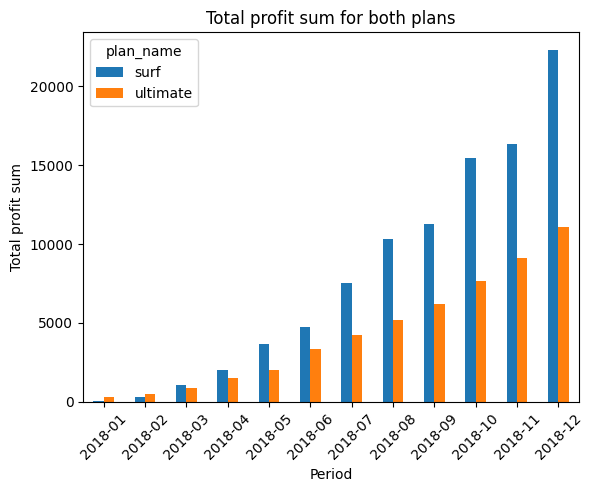

In [61]:
aux_receita['receita_total'].plot(kind = 'bar', xlabel = 'Period', ylabel = 'Total profit sum', title = 'Total profit sum for both plans', rot = 45)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto. antes, você estava usando 'mean' mas agora você usou 'sum' no pivot table.
</div>


CLaramente a receita total gerada a partir do plano 'Surf' é superior à do plano 'Ultimate'. Como pudemos ver, isto está intrinsecamente relacionado à quantidade de adicionais pagos pelos usuários devido ao baixo limite da contratação do plano, que parece ser compensado pelo baixo custo fixo mensal mas acaba não sendo. Apenas nos primeiros dois meses do ano a receita do plano Ultimate supera a do Surf, pois vimos que há uma certa sazonalidade dentro do consumo de dados, ligações e mensagens (os últimos meses do ano são mais ativos que os do início). 

## Teste hipóteses estatísticas

In [62]:
# Criados dois conjuntos de dados que consideram apenas usuários de cada plano para posteriormente aplicarmos os testes de hipótese.
surf_receita = df_analysis[df_analysis['plan_name'] == 'surf']['receita_total']
ultimate_receita = df_analysis[df_analysis['plan_name'] == 'ultimate']['receita_total']
#Avaliando variância dos valores para saber qual valor aplicar em "equal_var"
print(f'Variância Surf = {surf_receita.var()}')
print(f'Variância Ultimate = {ultimate_receita.var()}')
#Aplicando teste-t:
results = st.ttest_ind(surf_receita, ultimate_receita, equal_var = False)
print("Valor-p = ", results.pvalue)

Variância Surf = 3054.0975059318425
Variância Ultimate = 129.8484855509195
Valor-p =  3.6278039040985444e-16


Tendo em vista que o valor-p do teste t acima foi muito pequeno, constata-se que as amostras são, definitivamente, diferentes.

In [63]:
# Teste as hipóteses
# Definição das Hipóteses
# Hipótese nula (H0): Não há diferença significativa entre as receitas médias dos planos 'surf' e 'ultimate'.
# Hipótese alternativa (H1): Há uma diferença significativa entre as receitas médias dos planos 'surf' e 'ultimate'.

# Definindo o nível de significância
alpha = 0.01

# Filtrando os dados para cada plano
surf_receita = df_analysis[df_analysis['plan_name'] == 'surf']['receita_total']
ultimate_receita = df_analysis[df_analysis['plan_name'] == 'ultimate']['receita_total']

# Avaliando a variância dos valores
variancia_surf = surf_receita.var()
variancia_ultimate = ultimate_receita.var()
print(f'Variância Surf = {variancia_surf}')
print(f'Variância Ultimate = {variancia_ultimate}')

# Aplicando o teste t
results = st.ttest_ind(surf_receita, ultimate_receita, equal_var=False)

# Exibindo o valor-p
print("Valor-p = ", results.pvalue)

# Avaliando o resultado do teste
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula (H0). Há uma diferença significativa nas receitas.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há diferença significativa nas receitas.")


Variância Surf = 3054.0975059318425
Variância Ultimate = 129.8484855509195
Valor-p =  3.6278039040985444e-16
Rejeitamos a hipótese nula (H0). Há uma diferença significativa nas receitas.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
Note que são 2 testes.
    
Precisamos seguir estes passos para o teste de hipótese:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Avaliar se as variâncias são iguais, por exemplo, calculando a variância da amostra e verificando a igualdade (ex: sample1.var() == sample2.var())
- Em seguida, ajustar equal_var=True no teste T se as variâncias forem iguais, senão usamos equal_var=False no teste T: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
- Avaliar o resultado do teste T

</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

correto
</div>


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

In [64]:
#averiguando numero de usuarios por plano
number_users = df_analysis.groupby('plan_name')['user_id'].nunique()
number_users

plan_name
surf        333
ultimate    157
Name: user_id, dtype: int64

In [65]:
# Criados dois conjuntos de dados que consideram apenas usuários de cada plano para posteriormente aplicarmos os testes de hipótese.
receita_ny_nj = df_analysis[df_analysis['city'].str.contains('NY-NJ')]['receita_total'].reset_index()
receita_others = df_analysis[~df_analysis['city'].str.contains('NY-NJ')]['receita_total'].reset_index()

In [66]:
# Definição das Hipóteses
# Hipótese nula (H0): Não há diferença significativa entre as receitas médias dos usuários da área de NY-NJ e das demais regiões.
# Hipótese alternativa (H1): Há uma diferença significativa entre as receitas médias dos usuários da área de NY-NJ e das demais regiões.

# Definindo o nível de significância
alpha2 = 0.01

# Filtrando os dados para cada grupo
receita_ny_nj = df_analysis[df_analysis['city'].str.contains('NY-NJ')]['receita_total']
receita_others = df_analysis[~df_analysis['city'].str.contains('NY-NJ')]['receita_total']

# Avaliando a variância dos valores
variancia_ny_nj = receita_ny_nj.var()
variancia_others = receita_others.var()
print(f'Variância NY-NJ = {variancia_ny_nj}')
print(f'Variância Outras Regiões = {variancia_others}')

# Aplicando o teste t
results = st.ttest_ind(receita_ny_nj, receita_others, equal_var=False)

# Exibindo o valor-p
print("Valor-p = ", results.pvalue)

# Avaliando o resultado do teste
if results.pvalue < alpha2:
    print("Rejeitamos a hipótese nula (H0). Há uma diferença significativa nas receitas.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há diferença significativa nas receitas.")

Variância NY-NJ = 1890.3234829081778
Variância Outras Regiões = 2216.9641084823143
Valor-p =  0.031237788444585222
Não rejeitamos a hipótese nula (H0). Não há diferença significativa nas receitas.


<div class="alert alert-block alert-warning">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

Correto. Porém, você usou p-valor igual a 0.01, enquanto no teste anterior usou p-valor igual a 0.05. Confesso que senti falta de uma justificativa. Geralmente, usamos p-valor igual a 0.05
</div>


## Conclusão geral

- Tendo em vista o objetivo da análise, ficou clara a superação de receita do plano "surf" em detrimento do plano "ultimate". Isto pode ser observado ao longo de quase todo o ano, com exeção dos meses de janeiro e fevereiro.
- Foi possível observar que usuários do plano surf gastam muito mais com pacotes adicionais fora do plano do que efetivamente com os gastos fixos mensais, o que eleva o valor total pago. Apesar da maior quantidade de usuários, ele é mais rentável que o seu par, portanto os investimentos são potencialmente mais lucrativos neste plano. 
- Entretanto, vale ressaltar que a quantidade de usuários do plano Ultimate é menor, então possivelmente pode-se prospectar mais usuários para este plano, aumentando não a margem, porém a receita bruta total do plano. Além disso, o plano Ultimate pode não gerar mais renda quando observa-se o ano todo, mas gera um valor fixo mensal que pode sustentar a empresa.
- Desta forma, a decisão a ser tomada depende dos objetivos de curto, médio e longo prazo da empresa. Em curto prazo, o plano surf torna-se mais rentável. Em longo prazo, o plano Ultimate é a fundação sólida para garantir um crescimento sustentável.